# Gradient Descent
Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning and deep learning models. It works by iteratively adjusting the model's parameters (weights and biases) in the direction of the <b><i>steepest decrease</i></b> in the cost function.

#### Types
<ol>
    <li>Batch Gradient Descent</li>
    <li>Stochastic Gradient Descent</li>
    <li>Mini-Batch Gradient Descent</li>
</ol>

## How does it work?
Suppose we have a a Linear Regression model with the equation $mx+b$. If we plot the <i>cost function</i> against $m$ and $b$, we get this:<br>
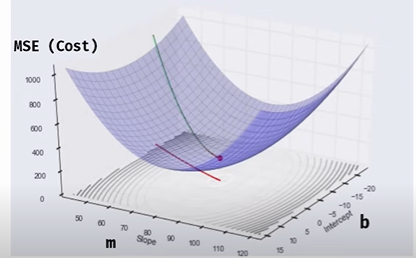 <br>
What we need is to get to the bottom of the graph, so we get the minimal cost function. We may do this through Gradient Descent.
Plotting the graph in 2D, we get:<br>
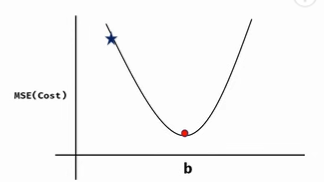<br>
One of the strategies is to take a random point (the star) and take fixed-size steps in the direction of minima. However, with this approach, we run the risk of crossing over the minima and not converge.<br>
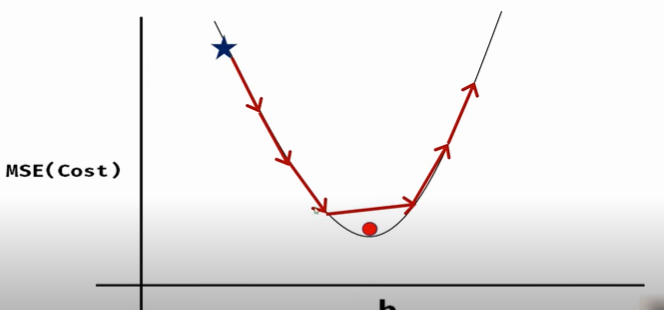<br>
Instead, in Gradient Descent, we begin from the random point in direction of steepest decrease, and decrease the step-size as we approach the minima, so we do not miss it.<br>
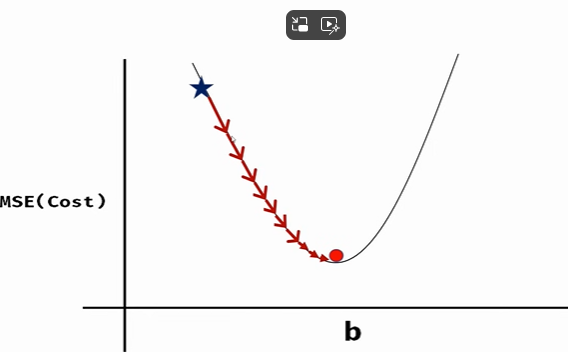<br>
To determine the step-size, we use the slope of our current point (decreases with slope):<br>
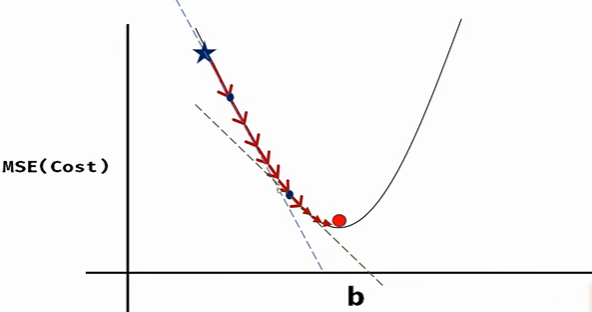<br>
In summary, we select a random starting point and an optimal <i>learning rate</i>, which determines the step size. We iterate this process multiple times until we eventually converge to a solution.

### Understanding through Code

In [3]:
from sklearn.datasets import make_regression #used to create datasets for regression
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

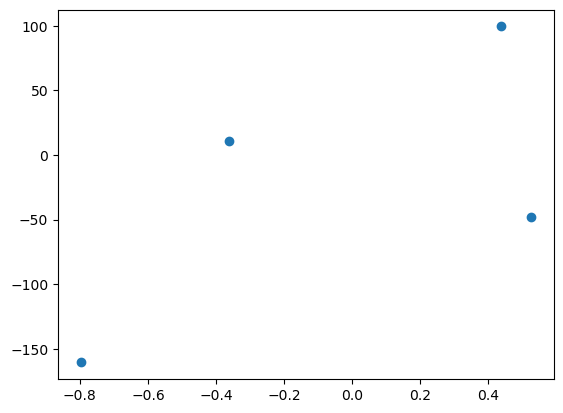

In [30]:
X,y = make_regression(n_samples=4,
                      n_features=1,
                      n_targets=1,
                      noise=80)
plt.scatter(X,y)

In [65]:
# Implementing Ordinary Least Square Method
reg = LinearRegression()
reg.fit(X,y)
m = reg.coef_ #112.19118629
b = reg.intercept_ #-19.09963591

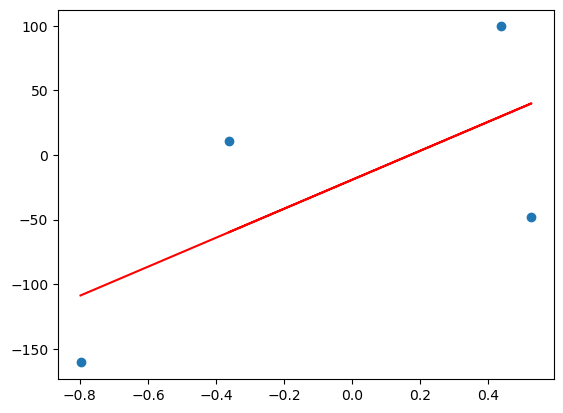

In [66]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [67]:
# Apply GD assuming slope is m=112.191
# And intercept (b=0)
y_pred = ((112.191*X)+0).reshape(4)

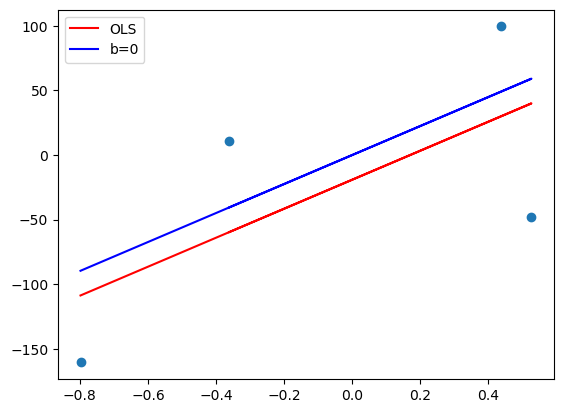

In [68]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='blue',label='b=0')
plt.legend()
plt.show()

In [72]:
m=m
b=0

In [73]:
loss_slope = -2 * np.sum(y-m*X.ravel() - b) # Inputting m and b into loss function

In [74]:
loss_slope

152.79708728460224

In [75]:
# Taking learning rate as 0.1
lr = 0.1

step_size = loss_slope * lr
step_size

15.279708728460225

In [76]:
# Calculating new intercept
b = b - step_size
b

-15.279708728460225

In [77]:
# Calculating second step
y_pred1 = ((m*X)+b)

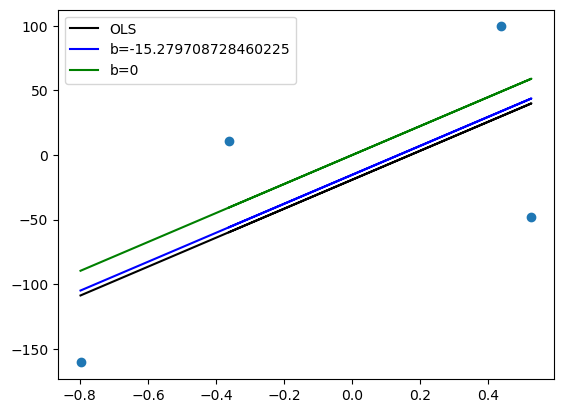

In [90]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='black',label='OLS')
plt.plot(X,y_pred1,color='blue',label=f'b={b}')
plt.plot(X,y_pred,color='green',label='b=0')
plt.legend()
plt.show()

In [91]:
loss_slope = -2*np.sum(y - m*X.ravel() -b)

In [94]:
step_size = loss_slope*lr

In [95]:
b = b - step_size

In [96]:
y_pred2 = ((m*X)+b)

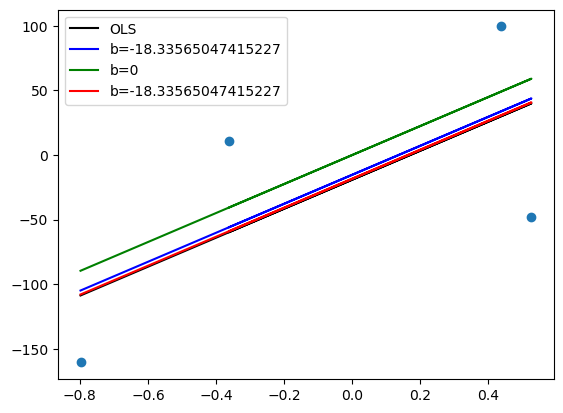

In [97]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='black',label='OLS')
plt.plot(X,y_pred1,color='blue',label=f'b={b}')
plt.plot(X,y_pred,color='green',label='b=0')
plt.plot(X,y_pred2,color='red',label=f'b={b}')
plt.legend()
plt.show()

In [98]:
# Third Step
loss_slope = -2 *np.sum(y-m*X.ravel()-b)

In [99]:
step_size = lr*loss_slope

In [100]:
b = b - step_size

In [104]:
print(b)
print(reg.intercept_)
# We are very close to the intercept value of OLS 

-18.946838823290676
-19.09963591057528


We can see that when we are farther away from the minima, we take bigger steps than when we are closer.

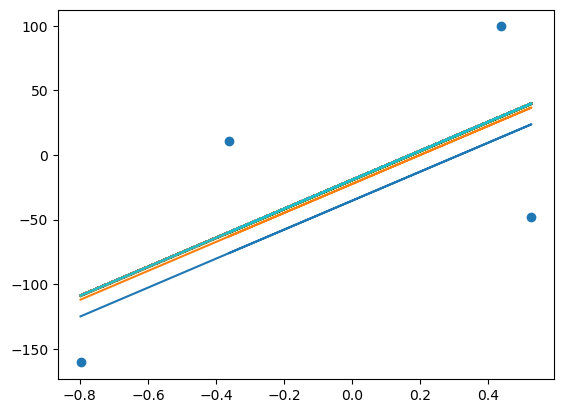

In [148]:
# Implementing GD with a loop
b=-100
m=reg.coef_
lr=0.1
epochs = 100 # number of iterations
for i in range(epochs):
    loss_slope = -2 *np.sum(y-m*X.ravel() - b)
    b -= lr*loss_slope
    y_pred = m*X +b
    plt.plot(X,y_pred)
plt.scatter(X,y)

In [149]:
# Making a GD Class

In [164]:
X,y = make_regression(n_samples=100,
                      n_features=1,
                      n_informative=1,
                      n_targets=1,
                      noise=20)

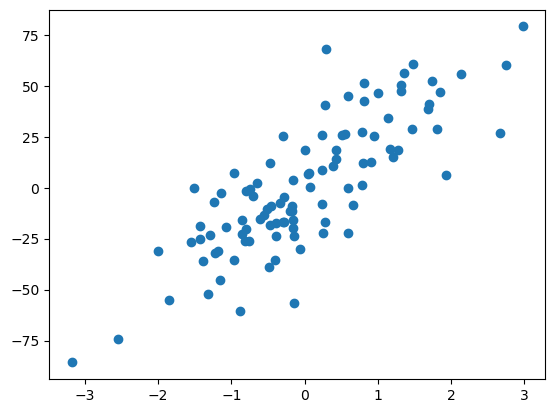

In [165]:
plt.scatter(X,y)

In [166]:
lr = LinearRegression()

In [167]:
lr.fit(X,y)

LinearRegression()

In [168]:
m = lr.coef_
b = lr.intercept_

In [183]:
m,b

(array([23.23796359]), 0.28272489053412264)

In [205]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = m
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope = -2*np.sum(y-self.m*X.ravel()-self.b)
            self.b -= self.lr*loss_slope
        print(self.b)

In [206]:
gd = GDRegressor(0.001,100)

In [207]:
gd.fit(X,y)

0.2827248904765303


### Gradient Descent for two variables (m and b)
Before, we used Gradient Descent while assuming m is constant. Now, let's try to obtain both variables.<br>
<b>Steps</b>
<ol>
    <li>Initialize m and b</li>
    <li>Decide number of epochs and Learning Rate</li>
    <li>We will differentiate the loss function with respect to both $m$ and $x$</li>
</ol>

In [216]:
X,y = make_regression(n_samples=100,
                      n_targets=1,
                      n_features=1,
                      n_informative=1,
                      noise=20)

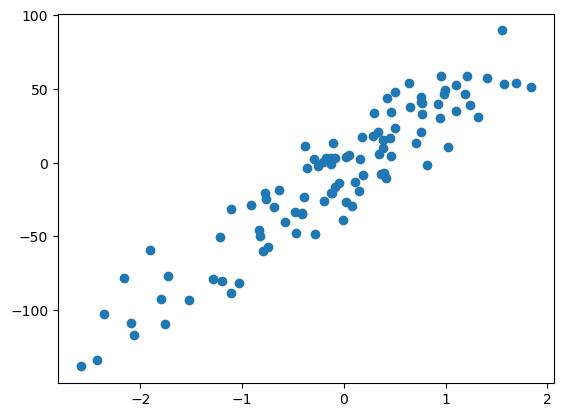

In [217]:
plt.scatter(X,y)

In [219]:
lr = LinearRegression()

In [220]:
lr.fit(X,y)

LinearRegression()

In [221]:
m = lr.coef_
b = lr.intercept_
print(m,b)

[45.83782107] -6.126527259477761


In [254]:
from sklearn.model_selection import cross_val_score,train_test_split

In [255]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.8191002205446016

In [256]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y-self.m*X.ravel()-self.b)
            self.b -= self.lr * loss_slope_b
            loss_slope_m = -2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.m -= self.lr * loss_slope_m
        print(self.m,self.b)

    def predict(self,X):
        y_pred = self.m*X + self.b
        return y_pred

In [257]:
gd = GDRegressor(0.001,60)

In [258]:
gd.fit(X,y)

45.837781923970596 -6.126673664666133


In [259]:
gd.predict(X)

array([[  50.54041589],
       [ -41.44202776],
       [-124.76975949],
       [ -11.67593285],
       [  65.01391861],
       [   7.61875894],
       [ -65.16259581],
       [ -11.48344053],
       [-114.0172699 ],
       [ -40.46696221],
       [  23.52497702],
       [ -10.20183399],
       [  49.40928773],
       [ -17.58175737],
       [  12.93938982],
       [  28.46272473],
       [ -11.94199742],
       [  44.35948174],
       [   1.06314102],
       [  -2.62716155],
       [ -43.66878393],
       [ -10.90836963],
       [  36.12734665],
       [ -75.73600899],
       [  -3.7123026 ],
       [  37.88212213],
       [ -35.49829224],
       [  15.23299718],
       [ -56.9756125 ],
       [  -8.24247533],
       [ -85.15704657],
       [  16.78057092],
       [ -14.05100422],
       [ -53.39088334],
       [ -11.9818452 ],
       [  78.42484372],
       [ -61.14945773],
       [ -28.22635489],
       [  29.32656894],
       [ -22.91272969],
       [  10.81043334],
       [  11.313

In [260]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [261]:
from sklearn.metrics import r2_score

In [262]:
gd.fit(X_train,y_train)

46.25290631805157 -6.512264648783319


In [263]:
y_pred = gd.predict(X_test)

In [264]:
r2_score(y_test,y_pred)

0.883606322452796

In [265]:
lr = LinearRegression()

In [266]:
lr.fit(X_train,y_train)

LinearRegression()

In [267]:
y_pred = lr.predict(X_test)

In [269]:
r2_score(y_test,y_pred)

0.8836063009756242

### The Effect of Learning Rate
We must choose an optimal Learning Rate since selecting a low LR means GD will fail to either fail to converge towards the solution or will converge very slowly, <b>OR</b> selecting a high LR might mean a big step-size and missing the solution entirely.
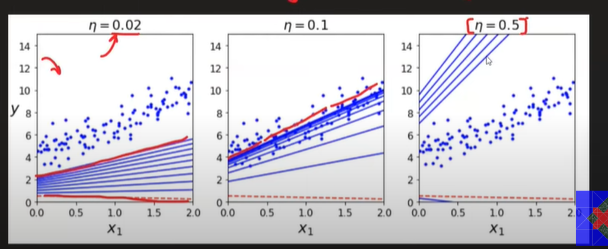

### The Effect of Loss Function
In case of convex functions, we have a global minima.<br>
In case of non-convex function, we will have local minimas, which might mean the algorithm will converge at the sub-optimal solution.
#### Saddle-Point Problem
We reach a plateau, where the slope is changing very slowly. Hence, each step will be smaller, and it will take a lot of time to converge to the solution.

### Effect of Data
If our features are on the same scale, the algorithm will converge quickly.<br>
However, if the features are not to scale, then our contour plot will be very flat and convergence will take a lot of time.<br>
It is highly recommended to scale your data for GD to perform optimally.